In [ ]:
!git clone https://github.com/j-min/VL-T5

Cloning into 'VL-T5'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 272 (delta 20), reused 16 (delta 11), pack-reused 243
Receiving objects: 100% (272/272), 1.03 MiB | 7.91 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [ ]:
cd VL-T5

/content/VL-T5


In [ ]:
!pip uninstall param -y # to resolve name conflict with src.param.py
!pip install -r requirements.txt
!python download_backbones.py

Found existing installation: param 1.12.2
Uninstalling param-1.12.2:
  Successfully uninstalled param-1.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/j-min/language-evaluation (to revision master) to /tmp/pip-req-build-e_iut3xu
  Running command git clone -q https://github.com/j-min/language-evaluation /tmp/pip-req-build-e_iut3xu
     |████████████████████████████████| 748.8 MB 19 kB/s 
     |████████████████████████████████| 1.8 MB 58.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
     |████████████████████████████████| 1.8 MB 53.5 MB/s 
     |████████████████████████████████| 116 kB 64.0 MB/s 
     |████████████████████████████████| 5.9 MB 65.0 MB/s 
     |████████████████████████████████| 2.9 MB 62.3 MB/s 
     |████████████████████████████████| 880 kB 59.9 MB/s 
     |████████████████████████████████| 181 kB 74.3 MB/s 
     |████████████████████████████████| 156 kB 61.0 MB/s 
 

In [ ]:
import gdown

In [ ]:
!mkdir -p VL-T5/snap/pretrain/VLT5

In [ ]:
gdown.download('https://drive.google.com/uc?id=100qajGncE_vc4bfjVxxICwz3dwiAxbIZ', 'VL-T5/snap/pretrain/VLT5/Epoch30.pth', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=100qajGncE_vc4bfjVxxICwz3dwiAxbIZ
To: /content/VL-T5/VL-T5/snap/pretrain/VLT5/Epoch30.pth
100%|██████████| 898M/898M [00:04<00:00, 222MB/s]


'VL-T5/snap/pretrain/VLT5/Epoch30.pth'

In [ ]:
import sys

In [ ]:
sys.path.append('/content/VL-T5/VL-T5/src')
sys.path.append('/content/VL-T5/VL-T5/inference')

In [ ]:
cd VL-T5

/content/VL-T5/VL-T5


In [ ]:
!pip uninstall param -y

In [ ]:
from param import parse_args

In [ ]:
args = parse_args(
    parse=False,
    backbone='t5-base',
    load='snap/pretrain/VLT5/Epoch30'
)
args.gpu = 0

In [ ]:
from vqa import Trainer

In [ ]:
trainer = Trainer(args,
                  train=False
                  )

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Building Model at GPU 0


Some weights of VLT5VQA were not initialized from the model checkpoint at t5-base and are newly initialized: ['encoder.visual_embedding.feat_embedding.0.weight', 'encoder.visual_embedding.feat_embedding.0.bias', 'encoder.visual_embedding.feat_embedding.1.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.bias', 'encoder.visual_embedding.absolute_vis_pos_embedding.1.weight', 'encoder.visual_embedding.obj_order_embedding.weight', 'encoder.visual_embedding.img_order_embedding.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded from  snap/pretrain/VLT5/Epoch30.pth
_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder.visual_embedding.layer_norm.weight'])
Model Launching at GPU 0
It took 3.6s


In [ ]:
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from inference.processing_image import Preprocess
from inference.visualizing_image import SingleImageViz
from inference.modeling_frcnn import GeneralizedRCNN
from inference.utils import Config, get_data

import wget
import pickle
import os


URL = "https://raw.githubusercontent.com/ndsha/VL-T5/main/COCO_train2014_000000362591.jpg"
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"

objids = get_data(OBJ_URL) 
attrids = get_data(ATTR_URL)
gqa_answers = get_data(GQA_URL) 
vqa_answers = get_data(VQA_URL) 
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg) 
image_preprocess = Preprocess(frcnn_cfg) 

# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

%s not found in cache or force_download set to True, downloading to %s https://s3.amazonaws.com/models.huggingface.co/bert/unc-nlp/frcnn-vg-finetuned/config.yaml /root/.cache/torch/transformers/tmpnmmjoutp


Downloading:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

loading configuration file cache
%s not found in cache or force_download set to True, downloading to %s https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin /root/.cache/torch/transformers/tmpc8f26cpy


Downloading:   0%|          | 0.00/262M [00:00<?, ?B/s]

loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /root/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [ ]:
image_filename = wget.download(URL)

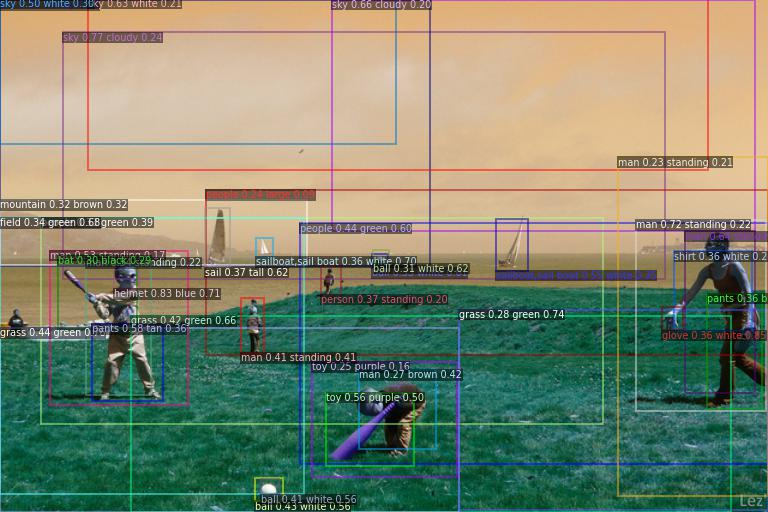

In [ ]:
image_dirname = image_filename
frcnn_visualizer = SingleImageViz(image_filename, id2obj=objids, id2attr=attrids) 

images, sizes, scales_yx = image_preprocess(image_filename) 

output_dict = frcnn(
    images, 
    sizes, 
    scales_yx = scales_yx, 
    padding = 'max_detections', 
    max_detections = frcnn_cfg.max_detections, 
    return_tensors = 'pt' 
)

# add boxes and labels to the image 
frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"), 
    output_dict.get("obj_ids"),
    output_dict.get("obj_probs"),
    output_dict.get("attr_ids"), 
    output_dict.get("attr_probs"),
)

showarray(frcnn_visualizer._get_buffer())

normalized_boxes = output_dict.get("normalized_boxes") 
features = output_dict.get("roi_features") 

In [ ]:
from tokenization import VLT5TokenizerFast

In [ ]:
tokenizer = VLT5TokenizerFast.from_pretrained('t5-base')

In [ ]:
questions = ["vqa: What are kids doing?", 
             "vqa: What color is the clothing the kid wears?", 
             "vqa: What is the color of hat kid wears",
             "vqa: How many horses are there?",
             "vqa: Are there any ships?",
             "vqa: is there any mountain?",
             "vqa: is there any lion?",
             "vqa: what color is bat?"
             

             ] 

In [ ]:
for question in questions:
    input_ids = tokenizer(question, return_tensors='pt', padding=True).input_ids
    batch = {}
    batch['input_ids'] = input_ids
    batch['vis_feats'] = features
    batch['boxes'] = normalized_boxes

    result = trainer.model.test_step(batch)
    print(f"Q: {question}")
    print(f"A: {result['pred_ans'][0]}")

Q: vqa: What are kids doing?
A: playing baseball
Q: vqa: What color is the clothing the kid wears?
A: brown
Q: vqa: What is the color of hat kid wears
A: blue
Q: vqa: How many horses are there?
A: 0
Q: vqa: Are there any ships?
A: yes
Q: vqa: is there any mountain?
A: yes
Q: vqa: is there any lion?
A: no
Q: vqa: what color is bat?
A: purple
